In [1]:
import pandas as pd
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter

In [2]:
cpu_data=pd.read_csv('sysinfo.csv')

In [3]:
#Changing the given timestamp value to float
cpu_data['created_at'] = pd.to_datetime(cpu_data['timestamp'], format="%Y-%m-%d %H:%M:%S")

def to_timestamp(dt):
    return dt.timestamp()
cpu_data['timestamp'] = cpu_data['created_at'].apply(to_timestamp)


In [4]:
#LOESS Smoothing
loess_smoothed = lowess(cpu_data['temperature'], cpu_data['timestamp'] , frac=0.05)


In [5]:
kalman_data=cpu_data[['temperature','cpu_percent','sys_load_1','fan_rpm']]

In [6]:
initial_state=kalman_data.iloc[0]
observation_covariance=np.diag([0,1,2,3])** 2
transition_covariance=np.diag([0.2,0.2,0.2,0.2])** 2
transition=[[0.97,0.5,0.2,-0.001],[0.1,0.4,2.2,0],[0,0,0.95,0],[0,0,0,1]]

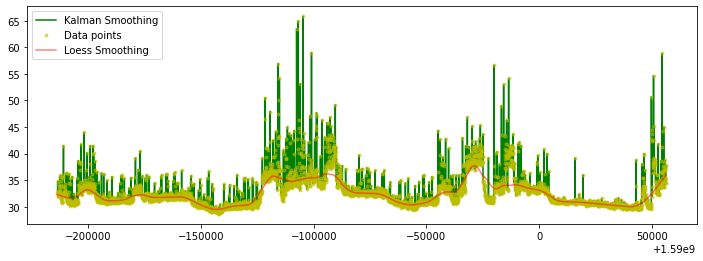

In [9]:
kf=KalmanFilter(
initial_state_mean=initial_state,
initial_state_covariance=observation_covariance,
observation_covariance=observation_covariance,
transition_covariance=transition_covariance,
transition_matrices=transition
)
kalman_smoothed,_=kf.smooth(kalman_data)

#Plot the output of LOESS smoothing and Kalman Smoothing
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'],kalman_smoothed[:,0],'g-',label="Kalman Smoothing")
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'y.',alpha=0.5,label="Data points")
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'r-',alpha=0.5,label='Loess Smoothing')
plt.legend()
plt.savefig('cpu.svg')